<a href="https://colab.research.google.com/github/huavanson/CS114.K21/blob/master/time_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math

Lấy dữ liệu xuống bằng URL


In [27]:
data=pd.read_csv('http://cs.uit.edu.vn/data2.txt',names=['size','time'])
data.head()

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [28]:
print(data.shape)

(71115, 2)


Thêm 2 cột size^2 và size*log(size) để tránh overfit và tăng khả năng dự đoán 

Biểu diễn dữ liệu 

(71115, 2)


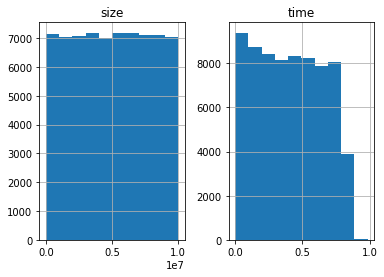

In [29]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
print(data.shape)
data.hist()
pyplot.show()

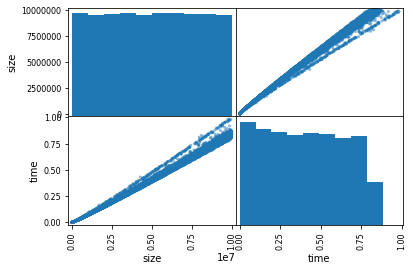

In [30]:
scatter_matrix(data)
pyplot.show()

Chia data với tỷ lệ 80-20

In [0]:
from sklearn.model_selection import train_test_split
arr=data.values
X=arr[:,0:1]
y=arr[:,1]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Chọn model bằng cách tính mean_absolute_error . Model nào có mean_absolute_error thấp là model đó tốt . Mean_absolute_error tính bằng cách sau khi cho model fit sẽ trả về giá trị y_valid dự đoán , lấy giá trị đó so sánh với y_valid thực tế để xem sự chênh lệch

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
models = []
models.append(('LN',LinearRegression()))
models.append(('RF',RandomForestRegressor()))
models.append(('DT',DecisionTreeRegressor()))
for name, model in models:
  print('fiting and training ',name)
  model.fit(X_train,y_train)
  val_pre=model.predict(X_validation)
  cv_results=mean_absolute_error(y_validation,val_pre)
  print(cv_results)

fiting and training  LN
0.00831551754510758
fiting and training  RF
0.008455530947407825
fiting and training  DT
0.009799554658390212


LinearRegression là model tốt nhất 

In [33]:
my_model=LinearRegression()
my_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Đưa 1 test tự cho vào để predict 

In [36]:
test_size=6083695
new_test_model=[[test_size]]
my_pre=my_model.predict(new_test_model)
print(my_pre)


[0.49849984]
